In [1]:
# Import necessary libraries for the project and define output format

from astropy import units as u
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box
import ipywidgets as widgets
from IPython.display import Math

from scipy import signal
import matplotlib.pyplot as plt

import pandas as pd

f = '{0:0.1f}'.format

# V_out = 32 * u.V
# I_out = 0.5 * u.A
# V_inmax = 50 * u.V
# V_inmin = 34 * u.V
# V_in = 40 * u.V

# I_ripplemax = 0.5 * I_out
# V_in_ripple_max = 100 * u.mV
# V_out_ripple_max = 200 * u.mV

# f_sw = 350 * u.kHz
# L_out = 220 * u.uH

In [2]:
# This is a container to 

style = {'description_width': 'initial'}

smps_I_out  = widgets.Text(
    value='0.5',
    placeholder='In A',
    description='Output Current:',
    style=style
)

smps_v_in = widgets.Text(
    value = '40',
    placeholder='In V',
    description='Input Voltage:',
    style=style
)

smps_v_out  = widgets.Text(
    value='32',
    placeholder='In V',
    description='Output Voltage:',
    style=style
)

smps_v_in_min = widgets.Text(
    value='34',
    placeholder='In V',
    description='Minimum Input Voltage:',
    style=style
)

smps_v_in_max = widgets.Text(
    value='50',
    placeholder='In Volts',
    description='Maximum Input Voltage:',
    style=style
)

smps_v_in_ripple = widgets.Text(
    value='100',
    placeholder='In mV',
    description='Input Voltage Ripple:',
    width='20%',    
    style=style
)

smps_v_out_ripple  = widgets.Text(
    value='200',
    placeholder='In mV',
    description='Output Voltage Ripple:',
    width='20%',
    style=style
)

smps_i_out_ripple_precent  = widgets.Text(
    value='50',
    placeholder='In %',
    description='Output Current Ripple Precent:',
    width='20%',
    style=style
)

smps_freq = widgets.IntSlider(
    value=350,
    min=100,
    max=1000,
    step=10,
    description='SMPS Switching Frequency:',
#     disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

smps_vref  = widgets.Text(
    value='1.223',
    placeholder='In V',
    description='Refrence Voltage into the Comperator:',
    width='20%',
    style=style
)

smps_choice = widgets.Select(
    options=['Buck (Step-down)', 'Boost (Step-up)'],
    rows=7,
    description='Converter Choice:',
    style=style,
    width='1000px'
)

controle_scheme = widgets.Select(
    options=['Voltage Mode', 'Current Mode', 'Hysteretic-Mode/D-Cap'],
    rows=7,
    description='Control Scheme:', 
    style=style
)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

box_layout_1 = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='90%')

in_out_params = Box([smps_v_in,smps_v_out,smps_v_in_max,smps_v_in_min,smps_I_out], layout=box_layout_1)

form_items = [
    Box([smps_choice,controle_scheme,in_out_params], layout=form_item_layout),
    Box([smps_v_in_ripple,smps_v_out_ripple,smps_i_out_ripple_precent], layout=form_item_layout),
    Box([smps_freq,smps_vref])
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='100%'
))
form

Box(children=(Box(children=(Select(description='Converter Choice:', options=('Buck (Step-down)', 'Boost (Step-…

In [3]:
# This container saves all user inputs into veriables to be used in this script

smps_choice_value = smps_choice.value
controle_scheme_value = controle_scheme.value

I_out = float(smps_I_out.value) * u.A
V_in = float(smps_v_in.value) * u.V
V_out = float(smps_v_out.value) * u.V
V_inmax = float(smps_v_in_max.value) * u.V
V_inmin = float(smps_v_in_min.value) * u.V
V_in_ripple_max = float(smps_v_in_ripple.value) * u.mV
V_out_ripple_max = float(smps_v_out_ripple.value) * u.mV
I_ripplemax = ((float(smps_i_out_ripple_precent.value)/100)* float(smps_I_out.value)) * u.A

f_sw = float(smps_freq.value) * u.kHz
V_fb = float(smps_vref.value) * u.V

print ('You choose to design a %s. The control scheme associated with your design is a %s \n'
       % (smps_choice_value, controle_scheme_value))

print('Output Current Entered:', I_out)

print('Input Volatge Entered:', V_in)

print('Output Volatge Entered:', V_out)

print('Input Volatge may range from', V_inmin, 'to', V_inmax)

print('Input Volatge Ripple Entered:', V_in_ripple_max)

print('Output Volatge Ripple Entered:', V_out_ripple_max)

print('Maximum Output Current Ripple Entered:', I_ripplemax)

print('Switching Frequency Entered:', f_sw)

print('The Comperator Refrence voltage Entered:', V_fb)


You choose to design a Buck (Step-down). The control scheme associated with your design is a Voltage Mode 

Output Current Entered: 0.5 A
Input Volatge Entered: 40.0 V
Output Volatge Entered: 32.0 V
Input Volatge may range from 34.0 V to 50.0 V
Input Volatge Ripple Entered: 100.0 mV
Output Volatge Ripple Entered: 200.0 mV
Maximum Output Current Ripple Entered: 0.25 A
Switching Frequency Entered: 350.0 kHz
The Comperator Refrence voltage Entered: 1.223 V


In [4]:
if smps_choice_value == 'Buck (Step-down)':
    print('DEFINING EQUATIONS:')
    display(Math(r'D = V_{out}/V_{in}'))
    display(Math(r'\Delta i = \frac {(V_{IN(max)}-V_{out})\times D} {f_s \times L}'))
    display(Math(r'I_{maxout} = I_{LIM(min)}-\frac{\Delta i_L}{2}'))
    display(Math(r'I_{SW(max)} = \frac{\Delta i_L}{2}+I_{OUT(max)}'))

    print('DESIGN INDUCTOR:')
    display(Math(r' L= \frac {(V_{IN(max)}-V_{out})\times V_{out}} {V_{in} \times f_s \times \Delta i }'))
    display(Math(r'\Delta i = (0.2\ to\ 0.4) \times I_{OUT(max)}'))

    print('DESIGN OUTPUT CAPCITOR:')
    display(Math(r' C_{OUT(min)}=  \frac {\Delta i} {8 \times f_s \times V_{out}}'))
    #used euqations from "http://www.ti.com/lit/an/slva477b/slva477b.pdf"

    print('DESIGN INPUT CAPCITOR:')
    display(Math(r' C_{in(min)}=  \frac {} {}'))


    print('DESIGN DIODE (IF NECESSARY):')

elif converter_choice_value=='Boost (Step-up)':
    print('DEFINING EQUATIONS:')
    display(Math(r'D = 1- \frac {V_{in}} {V_{out}}'))
    display(Math(r'\Delta i = \frac {(V_{IN(max)})\times D} {f_s \times L}'))
    display(Math(r'I_{maxout} = (I_{LIM(min)}-\frac{\Delta i_L}{2})\times (1-D)'))
    display(Math(r'I_{SW(max)} = \frac{\Delta i_L}{2}+\frac{I_{OUT(max)}}{1-D}'))

    print('DESIGN INDUCTOR:')
    display(Math(r' L= \frac {(V_{out}-V_{in})\times V_{in}} {V_{out} \times f_s \times \Delta i }'))
    display(Math(r'\Delta i = (0.2\ to\ 0.4) \times I_{OUT(max)} \times \frac {V_{out}} {V_{in}}'))

    print('DESIGN OUTPUT CAPCITOR:')
    display(Math(r' C_{OUT(min)}=  \frac {I_{OUT(max)}\times D} {f_s \times \Delta V_{out}}'))
    #used euqations from "http://www.ti.com/lit/an/slva372c/slva372c.pdf"

    print('DESIGN INPUT CAPCITOR:')
    display(Math(r' C_{in(min)}=  \frac {} {}'))


    print('DESIGN DIODE (IF NECESSARY):')



DEFINING EQUATIONS:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

DESIGN INDUCTOR:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

DESIGN OUTPUT CAPCITOR:


<IPython.core.display.Math object>

DESIGN INPUT CAPCITOR:


<IPython.core.display.Math object>

DESIGN DIODE (IF NECESSARY):


In [342]:
# Feedback network based on 1% standard resistor values

df = pd.read_csv('1percent_res_database.csv')

# sLength = len(df['Standard Resistor Value 1%'])
df['Rfb1'] = df['Standard Resistor Value 1%'].apply(lambda r: r*1)
df['Rfb2_actual'] = df['Rfb1'].apply(lambda rfb1: (V_fb / (V_out - V_fb) * rfb1))
rfb2_lst =[]
for x in df['Rfb2_actual']:
    if x < 0.1:
        rfb2_lst.append("{0:.4f}".format(x))
    else:
        rfb2_lst.append("{0:.3f}".format(x))

df['Rfb2']=pd.DataFrame(rfb2_lst).astype('float')
pd.to_numeric(df['Rfb2'])

# df['Exist'] = df['Standard Resistor Value 1%'].apply(lambda r: r in df['Rfb2'].values)
# df['Exist'] = df['Standard Resistor Value 1%'].apply(lambda r: 'true' if r%df['Rfb2'].values is int else 'false')

df['Exist'] = df['Rfb2'].apply(lambda r: (df['Standard Resistor Value 1%'].values/r)%10)

# for index, row in enumerate(df['Rfb2']):
#     print((df['Standard Resistor Value 1%'].value/row))

# df['std_resistor_index'] = []
# df['how close'] = []

# Create a list to store the data
std_resistor_index = []
how_close = []

for index, row in df.iterrows():
#     print(row['Exist'])
#     print(min(row['Exist']))
#     df = df.append({'std_resistor_index': row['Exist'].tolist().index(min(row['Exist']))}, ignore_index=True)
#     df = df.append({'how_close': min(row['Exist'])}, ignore_index=True)
#     print(np.where(row['Exist'] == row['Exist'].min()),row['Exist'].min())
    std_resistor_index.append(row['Exist'].tolist().index(min(row['Exist'])))
    how_close.append(min(row['Exist']))
    ### RN the software only prints out the last value seen in this loop... need to fix so each row is accurate

df['std_resistor_index']=std_resistor_index
df['how_close']= how_close
# #     print(row['Exist'].index[0])
# # df['Exist'] = df['Standard Resistor Value 1%'].apply(lambda r: r if ((r/df['Rfb2'].values)%10)==0 else False)
# # df['check'] = df['Exist'].apply(lambda x: [y if y <=1 else 10 for y in x])

# # print(df.Exist[5])

# # if 3.2%df.Rfb2[174] is int:
# # print(df.Rfb2[174])

# tol = 1e-10
# # df.Rfb2[abs(df.Rfb2) < tol] = 0.0
# # df['precent']=(3.2%.00003045< tol): 0.0)


for idx, val in enumerate(df['std_resistor_index']):
    print(df['Standard Resistor Value 1%'][val],df['Rfb2'][idx])
    res_compare = df['Standard Resistor Value 1%'][val]/df['Rfb2_actual'][idx]
    if res_compare > 10:
        scaler =100
    elif res_compare > 1:
        scaler = 10
    else:
        scaler = 1

#     print(scaler)
    decade = df['Standard Resistor Value 1%'][val]/df['Rfb2'][idx]    
    Vout = V_fb / ((df['Standard Resistor Value 1%'][val]/scaler) / (df.Rfb1[idx] + (df['Standard Resistor Value 1%'][val]/scaler)))
#     print(idx,val,res_compare,Vout,df.Rfb1[idx],df['Standard Resistor Value 1%'][val])

df['Vout']= Vout


# df['Vout'] = V_fb / (df.Rfb2 / (df.Rfb1 + df.Rfb2))

# df['Vout'] = V_fb / (df.Rfb2 / (df.Rfb1 + df.Rfb2))



# df['Vout'] =  (df.Rfb1 + df.Rfb2)

# df['Vout'] = df.apply(lambda row: row.Rfb2*10, axis=1)

# df = df[df.Exist == True]

print(df)

# pd.DataFrame(list(itertools.product(*df)))

# import csv

# with open('1percent_res_database.csv', 'r') as f:
#   reader = csv.reader(f)
#   your_list = list(reader)

# print(your_list)
# print itertools.permutations(your_list, 2)

# perm = permutations(your_list) 

# # Print the obtained permutations 
# for i in list(perm): 
#     print (i) 

# R_fb1 = 1 * u.MOhm
# R_fb2 = V_fb / (V_out - V_fb) * R_fb1
# print('R_fb2 (R_fbb):', f(R_fb2.to(u.kOhm)))

# R_fb2_closest = 39.2 * u.kOhm
# V_out_actual = V_fb / (R_fb2_closest / (R_fb1 + R_fb2_closest))
# print('V_out w/ error:', f(V_out_actual.to(u.V)))

3.97 0.0397
3.61 0.0401
1.62 0.0405
1.24 0.0413
4.17 0.0417
3.79 0.0421
2.13 0.0425
8.66 0.0433
4.37 0.0437
3.97 0.0441
8.98 0.0449
4.53 0.0453
7.77 0.0457
1.4 0.0465
6.57 0.0469
1.91 0.0477
4.81 0.0481
1.47 0.0489
4.93 0.0493
3.01 0.0501
1.01 0.0505
1.54 0.0513
5.17 0.0517
1.05 0.0525
1.06 0.0529
5.36 0.0536
8.16 0.0544
2.74 0.0548
5.56 0.0556
1.13 0.0564
9.09 0.0568
5.76 0.0576
8.76 0.0584
2.37 0.0592
2.98 0.0596
6.04 0.0604
6.12 0.0612
1.24 0.062
9.42 0.0628
1.91 0.0636
1.29 0.0644
2.61 0.0652
1.32 0.0656
3.32 0.0664
3.36 0.0672
2.05 0.0683
2.77 0.0691
1.4 0.0699
1.42 0.0707
1.43 0.0715
7.23 0.0723
1.47 0.0731
2.23 0.0743
3.01 0.0751
7.59 0.0759
1.54 0.0767
1.56 0.0779
7.87 0.0787
7.96 0.0795
1.62 0.0807
1.64 0.0815
2.49 0.0827
4.17 0.0834
9.31 0.0846
1.72 0.0854
8.66 0.0866
1.76 0.0878
1.78 0.0886
8.98 0.0898
1.82 0.091
2.77 0.0922
2.8 0.093
9.42 0.0942
1.91 0.0954
2.91 0.0966
1.96 0.0978
1.98 0.0989
1.0 0.1
1.01 0.101
3.09 0.103
1.04 0.104
1.05 0.105
1.06 0.106
4.32 0.108
1.09 0.1

In [ ]:
# Feedback ripple generator
C_out = 4.7 * u.uF
# C_out = I_ripplemax / (8 * f_sw * V_out_ripple_max)
print('Output capacitor:', f(C_out.to(u.uF)))

R_esr1 = V_out / (2 * V_in * f_sw * C_out)
R_esr2 = 20 * u.mV / I_ripplemax
R_esr = max(R_esr1, R_esr2)
print('R_esr:', f(R_esr.to(u.Ohm)))
C_ff = 1 / (2 * np.pi * f_sw * (R_fb1 ** -1 + R_fb2 ** -1) ** -1)
print('Feed-forward capacitor:', f(C_ff.to(u.pF)))

In [14]:
# Output Inductor
# L_out = V_out / (f_sw * I_ripplemax) * (1 - V_out / V_in)
print('Selected output inductor value:', f(L_out.to(u.uH)))
I_L_ripple = V_out / (f_sw * L_out) * (1 - V_out / V_inmax)
I_L_peak = I_out + I_L_ripple / 2
print('Output inductor ripple curent:', f(I_L_ripple.to(u.mA)))
print('Output inductor peak current:', f(I_L_peak.to(u.mA)))

NameError: name 'L_out' is not defined

In [15]:
# Output capacitor
V_out_ripple = I_L_ripple * np.sqrt(R_esr ** 2 + (1 / (8 * f_sw * C_out)) ** 2)
print('Expected output voltage ripple:', f(V_out_ripple.to(u.mV)))

D = 0.9
C_in = I_out * D * (1 - D) / (f_sw * (V_in_ripple_max - I_out * R_esr))
#C_in = 2.2 * u.uF
print('Calculated input capacitor:', f(C_in.to(u.uF)))
V_in_ripple = I_out * D * (1 - D) / (f_sw * C_in) + I_out * R_esr
print('Expected input ripple:', f(V_in_ripple.to(u.mV)))

NameError: name 'I_L_ripple' is not defined

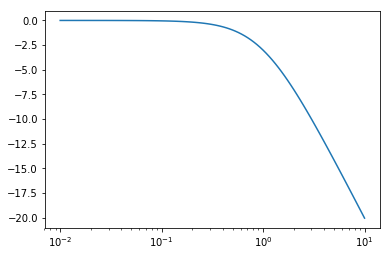

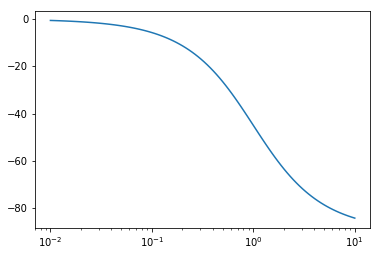

In [16]:
# Will print 

s1 = signal.lti([1], [1, 1])
w, mag, phase = signal.bode(s1)


plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [ ]:
# Compensation 

# VOLTAGE MODE
# http://www.ti.com/lit/an/slva301/slva301.pdf - Buck
# http://www.ti.com/lit/an/slva633/slva633.pdf - Boost

# Current Mode 
# http://www.ti.com.cn/cn/lit/an/snva555/snva555.pdf - BOTH
# http://www.ti.com/lit/an/slva636/slva636.pdf - Boost
# http://www.ti.com/lit/an/slvae09/slvae09.pdf - Buck

# D-CAP
# More info: https://www.powerelectronics.com/dc-dc-converters/hysteretic-mode-converters-demystified-part-1